## PART III - LINEAR REGRESSION - INSURANCE DATA 

### This dataset has 6 features and  target column is the charges which we are going to predict using linear regression.

"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."


In [1]:
# Step - 1 - Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Step 2 - data reading and preprocessing
insurance_df = pd.read_csv('insurance.csv')

In [3]:
# Print the first 5 rows of the dataframe
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Print statistical summary of the data
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# print column names
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# Print data types of each column
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Print shape of the dataframe
insurance_df.shape

(1338, 7)

In [8]:
# Print the number of missing values in each column  
print(insurance_df.isna().sum())
# No missing values in the dataset 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
# Step -3 - Convert columns with data type string to categorical
insurance_df['sex'] = insurance_df['sex'].map({'male':1, 'female':0})
insurance_df['smoker'] = insurance_df['smoker'].map({'yes':1, 'no':0})
insurance_df['region'] = insurance_df['region'].map({'southeast':0, 'southwest':1,'northeast':2, 'northwest':3})

In [10]:
# Print after converting string data type to categorical
insurance_df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [11]:
# describe the data
insurance_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


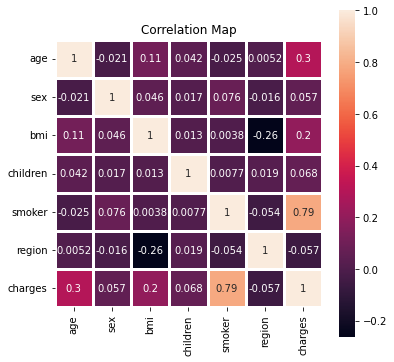

In [12]:
plt.figure(figsize=(6,6))
plt.title('Correlation Map')
ax=sns.heatmap(insurance_df.corr(),linewidth=3.0,annot=True,square=True)
##From the below plot we can see charges are highly correlated to feature smoker 

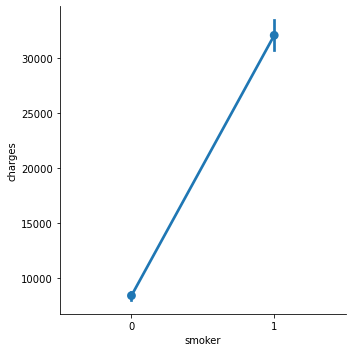

In [13]:
sns.catplot(x="smoker",y="charges",kind="point",data=insurance_df);
##it is seen that being a smoker increases the insurance charges drastically

In [14]:
# Step - 5 - choosing charges as the target
##the target variable charges is defined as y 
## All the independent variables are stored in the vector X
y = insurance_df['charges']
X = insurance_df.drop(columns=['charges'])

In [15]:
# Step -6- choose 80% training and 20% testing

X_train = insurance_df.sample(frac=0.8, random_state=200)
X_test = insurance_df.drop(X_train.index)

y_train = X_train['charges']
y_test = X_test['charges']

X_train.drop(columns=['charges'], inplace=True)
X_test.drop(columns=['charges'], inplace=True)


In [16]:
# Step - 7- Print the shape of the training and testing sets
print("X_train shape: " ,X_train.shape)
print("X_test shape: " ,X_test.shape)
print("y_train shape: " ,y_train.shape)
print("y_test shape: " ,y_test.shape)

X_train shape:  (1070, 6)
X_test shape:  (268, 6)
y_train shape:  (1070,)
y_test shape:  (268,)


In [17]:
def linear_regression(x,y):
    intercept_ones = np.ones((len(x),1)) # results in array with ones

    x_b = np.c_[intercept_ones,x] # we now add the additional ones as a new column to our X

    w = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) 
    # the normal equation 𝒘 = (𝑿𝑇𝑿)−1𝑿𝑇y

    return w

In [18]:
weights=linear_regression(X_train,y_train)
print(f'The weights vector is :\n', weights)
## Bais=-13220.55779694
## w1 to w6= [257.44633325    -53.45122519    341.59810354   423.2506221   23914.85446346    432.68508141]


The weights vector is :
 [-13220.55779694    257.44633325    -53.45122519    341.59810354
    423.2506221   23914.85446346    432.68508141]


#### Weight associated for age ,sex, bmi , children and region is lesser compared to  the weight associated with feature smoker ,since smoker is highly correlated to charges compared to other features as seen above

In [19]:
def predict(X, w):
    intercept_ones = np.ones((len(X),1))
    x_b = np.c_[intercept_ones,X]
    y_pred = np.matmul(x_b, w) 
    return y_pred


In [20]:
# Predict the y values for the test set
y_pred = predict(X_test, weights)
##y_pred

In [21]:
##Verifying the weights 
# from sklearn.linear_model import LinearRegression
# linreg = LinearRegression()
# linreg.fit(X_train,y_train)
# print(linreg.coef_,linreg.intercept_)
# ### we get same results using sklearn

# [-13179.14499402    257.2547905     -47.24485773    341.47064816
#     422.68609701  23777.57144854    429.74130361]

In [22]:
def mse(y_test,y_pred):
    return np.mean((y_test-y_pred)**2)

In [23]:
mse(y_test,y_pred)  ##32635482.918829143

32635482.918829143

/Users/sheetaljayaramgowda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


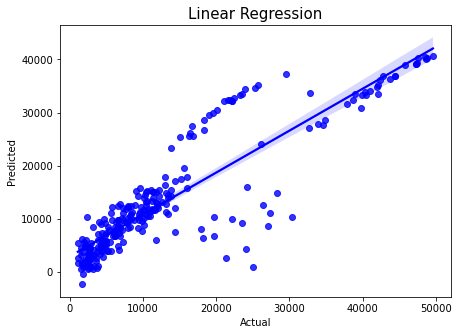

In [24]:
# Plot the predicted values and the actual values 
# plot linear regression line with polyfit
# plot regression line with weights
plt.figure(figsize=(7, 5))
ax = sns.regplot(y_test, y_pred, color='blue',data='insurance_df')
ax.set(xlabel='Actual', ylabel='Predicted')
plt.title('Linear Regression',fontsize=15)
plt.show()



/Users/sheetaljayaramgowda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


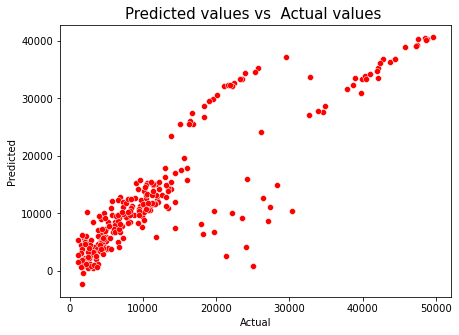

In [25]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(y_test, y_pred, color='red')
ax.set(xlabel='Actual', ylabel='Predicted')
plt.title('Predicted values vs  Actual values ',fontsize=15)
plt.show()

## PART IV : RIDGE REGRESSION - INSURANCE DATA 

In [26]:
def ridge_regression(X,y,alpha):
    intercept_ones = np.ones((len(X),1))        # results is array with ones
    X_b = np.c_[intercept_ones,X]               # we now add the additional ones as a new column to our X
    I = np.identity(X_b.shape[1])               # we add identity matrix with dimensions (n+1)
    I[0][0] = 0                                 # adjusting the first value in I to be 0, to account for the intercept term
    w = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y) # the normal equation
    return w

In [27]:
##Taking Alpha=10
weights_ridge = ridge_regression(X_train, y_train, 100)
print(f'Weights value for Ridge Regression:\n',weights_ridge)
# output: [-10520.00112062    245.14649428    240.87334807    333.49053028
##    380.72595927  15165.67991842    245.6883902 ]


Weights value for Ridge Regression:
 [-10520.00112062    245.14649428    240.87334807    333.49053028
    380.72595927  15165.67991842    245.6883902 ]


In [28]:
for i in range(0,110,10):
    weights_ridge=ridge_regression(X_train, y_train, i)  
    if i%10==0:
            print(f'Weights for alpha {i}\n',weights_ridge)

Weights for alpha 0
 [-13220.55779694    257.44633325    -53.45122519    341.59810354
    423.2506221   23914.85446346    432.68508141]
Weights for alpha 10
 [-1.28257499e+04  2.55623539e+02  3.73925254e+00  3.40387303e+02
  4.17791353e+02  2.26095839e+04  4.04699147e+02]
Weights for alpha 20
 [-12469.77197753    253.9865105      51.42166801    339.30375022
    412.70576979  21439.64161147    379.62454935]
Weights for alpha 30
 [-12147.05347321    252.50804266     91.34646795    338.32799126
    407.94042822  20384.99899807    357.03456567]
Weights for alpha 40
 [-11853.0499374     251.16601229    124.89216625    337.44429917
    403.45208981  19429.39639507    336.5821052 ]
Weights for alpha 50
 [-11584.01590693    249.94224215    153.15532593    336.63982848
    399.20539529  18559.49591819    317.98191741]
Weights for alpha 60
 [-11336.83563817    248.82165656    177.01619215    335.90398742
    395.17114447  17764.25316291    300.99737598]
Weights for alpha 70
 [-11108.89532138    

In [29]:
def predict(X, w):
    intercept_ones = np.ones((len(X),1))
    x_b = np.c_[intercept_ones,X]
    y_pred = np.matmul(x_b, w) 
    return y_pred


In [30]:
y_pred_ridge = predict(X_test, weights_ridge)
##len(y_pred_ridge)

In [31]:
##Calculating MSE for Ridge Regression

def mse(y, y_pred):
    error = y-y_pred_ridge
    loss = 1/(y.size) * np.dot(error.T, error)
    return loss

def ridgeMSE(y, y_pred_ridge, alpha, w):
    ##mse = mse(y, y_pred)
    ridge_mse = mse(y, y_pred_ridge) + alpha * np.dot(w,w)
    return ridge_mse

In [32]:
alpha=10
ridgeMSE(y_test, y_pred_ridge,alpha, weights_ridge)

MSE=3455263980.113051

In [33]:
## MSE values for different values of Alpha
## We can see for small values of alpha the MSE is close to linear regression,
## Higher value of alpha leads to a more restricted model so the coeffients have smaller values and a higher MSE

for i in range(0,100,10):
    Loss=ridgeMSE(y_test, y_pred,i, weights_ridge)   
    if i%10==0:
            print(f'Alpha = {i}  MSE =',(Loss))


Alpha = 0  MSE = 44234792.969965674
Alpha = 10  MSE = 3455263980.113051
Alpha = 20  MSE = 6866293167.256137
Alpha = 30  MSE = 10277322354.399221
Alpha = 40  MSE = 13688351541.542307
Alpha = 50  MSE = 17099380728.685392
Alpha = 60  MSE = 20510409915.82848
Alpha = 70  MSE = 23921439102.971565
Alpha = 80  MSE = 27332468290.11465
Alpha = 90  MSE = 30743497477.257736


/Users/sheetaljayaramgowda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


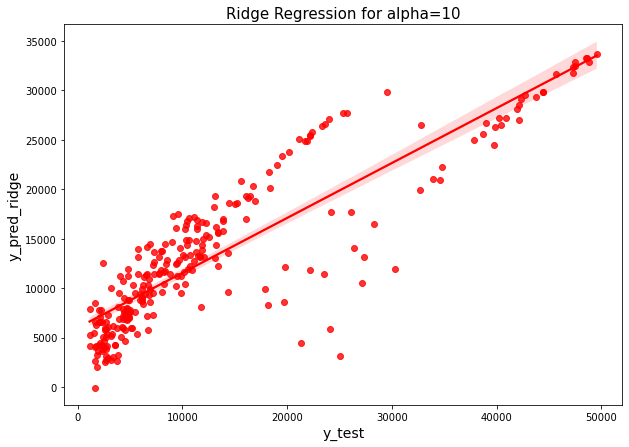

In [34]:
plt.figure(figsize=(10, 7))
plt.title('Ridge Regression for alpha=10',fontsize=15)
ax=sns.regplot(y_test, y_pred_ridge, color='red')
plt.xlabel('y_test',fontsize=14)
plt.ylabel('y_pred_ridge',fontsize=14)
plt.show()

/Users/sheetaljayaramgowda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sheetaljayaramgowda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


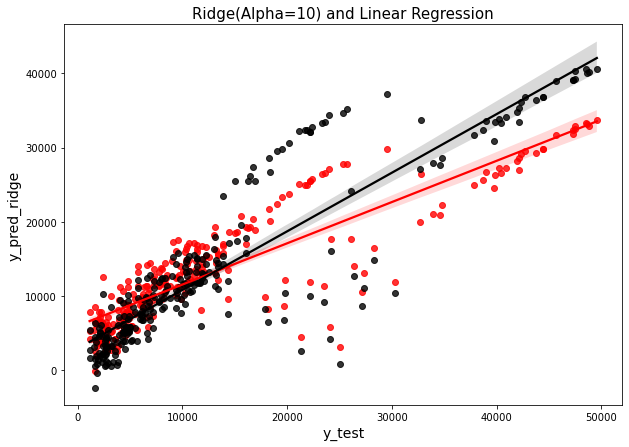

In [35]:
plt.figure(figsize=(10, 7))
plt.title('Ridge(Alpha=10) and Linear Regression',fontsize=15)
ax=sns.regplot(y_test, y_pred_ridge, color='red')
ax= sns.regplot(y_test, y_pred, color='black')
plt.xlabel('y_test',fontsize=14)
plt.ylabel('y_pred_ridge',fontsize=14)
plt.show()

## Gradient Descent

In [36]:
intercept_ones = np.ones((len(X_train),1)) # results in array of 1s
x_b = np.c_[intercept_ones,X_train] 
x_b.shape ##(1070, 7)

(1070, 7)

In [37]:
w = ridge_regression(X_train, y_train, 100)
print(w)

[-10520.00112062    245.14649428    240.87334807    333.49053028
    380.72595927  15165.67991842    245.6883902 ]


In [38]:
def create_function(w):
    def f(x_b):
        return np.dot(x_b,w)
    return f


In [39]:
f = create_function(w)
y_pred = f(x_b)
diff=y_train-y_pred
print(diff)

992     -3164.340659
937      -794.419469
688     16571.159730
1185    -1258.506662
1137     -828.079689
            ...     
1027    19257.800249
732     -2554.518971
1071    -2168.632322
801     -2851.182587
995      -449.783657
Name: charges, Length: 1070, dtype: float64


In [40]:
X_train.T.dot(diff).sum() * -(2/y_train.size)

-3104.9728300005945

In [41]:
def mse(y, y_pred):
    error = y-y_pred_ridge
    loss = 1/(y.size) * np.dot(error.T, error)
    return loss

def ridgeMSE(y, y_pred_ridge, alpha, w):
    ridge_mse = mse(y, y_pred_ridge) + alpha * np.dot(w,w)
    return ridge_mse


In [42]:
loss = ridgeMSE(y_test, y_pred,100, weights_ridge)
loss=34154526664.40082

In [43]:
def mse_derivative_m(X_train,y_train,y_pred):
    diff=y_train-y_pred
    return X_train.T.dot(diff) * -(2/y_train.size)
    
def mse_derivative_b(y_train,y_pred):
    diff=y_train-y_pred
    return -(2/y_train.size) * sum(diff)


In [44]:
mse_derivative_m(X_train,y_train,y_pred)

age          -45.821775
sex          -45.023056
bmi          -62.334679
children     -71.163731
smoker     -2834.706527
region       -45.923064
dtype: float64

In [45]:
mse_derivative_b(y_train,y_pred)

3.687108520888419e-11

In [46]:
gradient = np.array([mse_derivative_m(X_train,y_train,y_pred), mse_derivative_b(y_train,y_pred)])
gradient

/var/folders/2l/lwcdtm192tl0vsj2nj9kl1780000gn/T/ipykernel_91892/34244867.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gradient = np.array([mse_derivative_m(X_train,y_train,y_pred), mse_derivative_b(y_train,y_pred)])


array([age          -45.821775
       sex          -45.023056
       bmi          -62.334679
       children     -71.163731
       smoker     -2834.706527
       region       -45.923064
       dtype: float64         , 3.687108520888419e-11], dtype=object)

In [47]:
w=w-0.001 * gradient 
print(w)

ValueError: operands could not be broadcast together with shapes (7,) (2,) 

In [ ]:
##combing above steps into a function

In [ ]:
def gradient_descent(X_train, y_train, w, number_of_iterations, learning_rate):
    
    intercept_ones = np.ones((len(X_train),1)) # results in array of 1s
    x_b = np.c_[intercept_ones,X_train] 
    
    loss_history=[]
    
   

    for i in range(number_of_iterations):
        
        # predict and calculate loss
        f = np.dot(x_b,w) # create the current function
        y_pred = f(x_b) # predict our entire x
        
        def mse_derivative_m(X_train,y_train,y_pred):
            diff=y_train-y_pred
            return X_train.T.dot(diff) * -(2/y_train.size)
    
        def mse_derivative_b(y_train,y_pred):
            diff=y_train-y_pred
            return -(2/y_train.size) * sum(diff)
        
        loss = ridgeMSE(y_test, y_pred,100, weights_ridge)
        
        loss_history.append(loss)
            
        # perform optimization
        def mse_derivative_m(X_train,y_train,y_pred):
            diff=y_train-y_pred
            return X_train.T.dot(diff) * -(2/y_train.size)
    
        def mse_derivative_b(y_train,y_pred):
            diff=y_train-y_pred
            return -(2/y_train.size) * sum(diff)
        
        gradient = np.array([mse_derivative_m(X_train,y_train,y_pred), mse_derivative_b(y_train,y_pred)]) # calculate gradient
        w = w - learning_rate * gradient 
        
        if i%10==0:
            print("Current iteration : {}, Current Loss: {}".format(i,loss))
        
    return w,loss_history


In [ ]:
###gradient_descent(X_train, y_train, w, 100, 0.001)